In [14]:
from queue import Queue
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
# from scipy import ndimage
import matplotlib.pyplot as plt
from utils import *
from environment import *
from agent import *
import io
import cv2
import random
from tqdm.notebook import tqdm
from geneticalg import GeneticAlgorithm
import copy
import pickle

In [15]:
# results_string_name = "GA_5RandomAgent_0.1elitism_0.1mutation_40food_20blocks"
results_string_name = "GA_5SwarmAgent_0.1elitism_0.1mutation_40food_20blocks"

pickle_file = open("Pickled/" + results_string_name, "rb")
pickle_dict = pickle.load(pickle_file)
grids = pickle_dict['grids']
fitness_values = pickle_dict['fitness values']
env_params = pickle_dict['env_params']

In [16]:
i = 99 # iteration number for grid of interest
n = 0 # number within iteration pool for grid of interest
num_agents = 5 # num agents


Fitness: 0.0


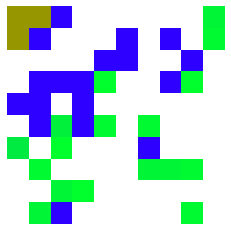

In [17]:
# Visualize a grid of interest
%matplotlib inline

p = grids[i][n]
pp = process_grids((np.zeros_like(p), p, np.zeros_like(p)), env_params)
to_replace = np.where((pp[0] == [0,0,0]).all(axis=2))
pp[0][to_replace] = pp[1][to_replace]
plt.imshow(pp[0].astype('uint8'))
plt.axis('off')
print("Fitness: " + str(fitness_values[i][n]))

In [44]:
# Run simulation on a grid of interest
env = Environment(env_params, grid = grids[i][n])

testAgents = [SwarmAgent(i, env_params, env.spt) for i in range(num_agents)]
# test_agents = [DQNAgent(i, env_params, net_filepath="DQN/target_net.pt") for i in range(5)]
food_collected, env_observations = env.run_episode(testAgents, visualize = True)
print(food_collected)

grid
 3.0 3.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0 8.0
 3.0 4.0 0.0 0.0 0.0 4.0 0.0 4.0 0.0 7.0
 0.0 0.0 0.0 0.0 4.0 4.0 0.0 0.0 4.0 0.0
 0.0 4.0 4.0 4.0 6.0 0.0 0.0 4.0 6.0 0.0
 4.0 4.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 4.0 9.0 4.0 7.0 0.0 7.0 0.0 0.0 0.0
10.0 0.0 6.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0
 0.0 7.0 0.0 0.0 0.0 0.0 8.0 8.0 7.0 0.0
 0.0 0.0 8.0 6.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 8.0 4.0 0.0 0.0 0.0 0.0 0.0 7.0 0.0
static
 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0


<IPython.core.display.Javascript object>


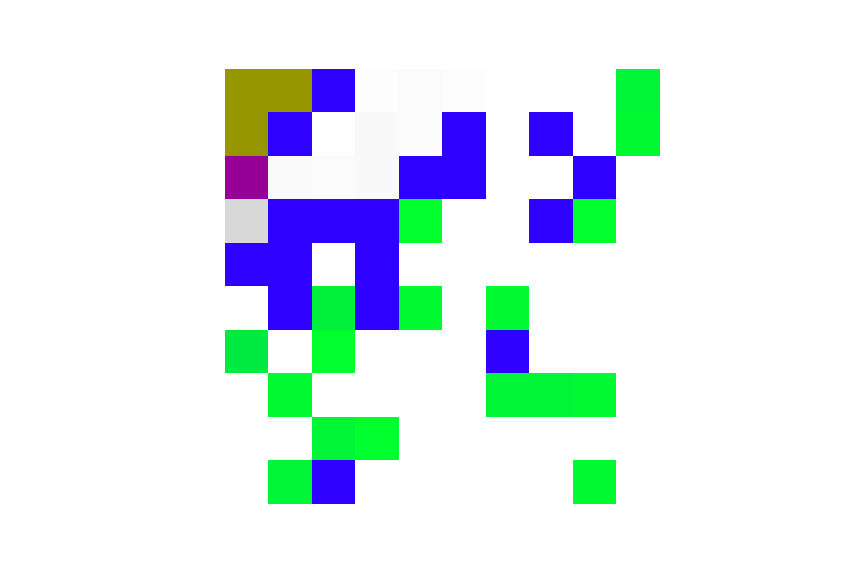

In [45]:
%matplotlib notebook
# View simulation
# may need to rerun a few times to make it work
# https://stackoverflow.com/questions/10429556/animate-quadratic-grid-changes-matshow

empty_grid = np.zeros_like(env_observations[-1][0])
empty_obs = (empty_grid, empty_grid, empty_grid)

for _ in range(20):
    env_observations.append(empty_obs)

def set_frame(obs, env_params, update_mat = True):
    pp = process_grids(obs, env_params)
    to_replace = np.where((pp[0] == [0,0,0]).all(axis=2))
    pp[0][to_replace] = pp[1][to_replace]
    if update_mat:
        mat.set_data(pp[0].astype('uint8'))
    return pp[0].astype('uint8') 


fig, ax = plt.subplots()
mat = ax.matshow(set_frame(env_observations[0], env_params, update_mat = False))
ani = animation.FuncAnimation(fig, set_frame, env_observations, interval=20,
                              save_count=50, blit = True, fargs = (env_params,))
plt.axis('off')
plt.show() 

In [13]:
# SAVE GIF
gif_name = results_string_name + "_iter" + str(i) + "_n" + str(n) + ".gif"

# gif_name = "test_nearest.gif"
    
save_as_gif(env_observations, env_params, gif_name, to_size = (100,100), frame_len = 50)

Saving as GIF...
Your file test_nearest.gif has been saved!
